# 動的時間伸縮法(DTW)
[fastdtw](https://github.com/slaypni/fastdtw)を利用して、時系列データ間の類似度を求めます。

<iframe width="560" height="315" src="https://www.youtube.com/embed/7sWtbayTUA0" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw

## 実験に使用する二つの波形をプロット

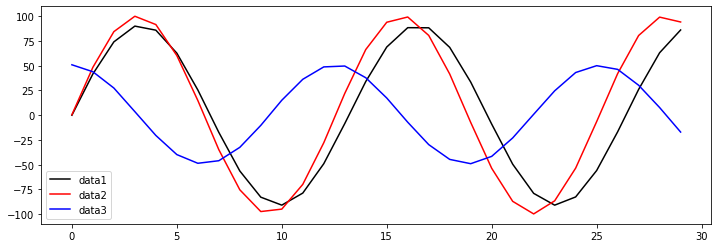

In [2]:
data1 = [91.0 * np.sin(i / 2.1) for i in range(30)]
data2 = [100.0 * np.sin(i / 2.0) + np.random.rand() for i in range(30)]
data3 = [50.0 * np.cos(i / 2.0) + np.random.rand() for i in range(30)]

plt.figure(figsize=(12, 4))

# 波形をプロット
plt.plot(data1, label="data1", color="k")
plt.plot(data2, label="data2", color="r")
plt.plot(data3, label="data3", color="b")
plt.legend()
plt.show()

## DTWを計算し対応関係をプロットする

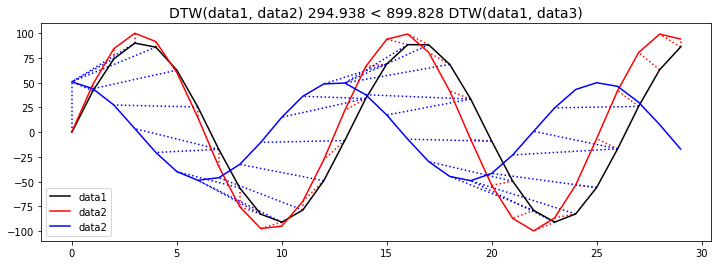

In [3]:
# DTWを計算
distance_12, path_12 = fastdtw(data1, data2)
distance_13, path_13 = fastdtw(data1, data3)

# 対応するポイントを線で結ぶ
plt.figure(figsize=(12, 4))
for x_12, x_13 in zip(path_12, path_13):
    plt.plot(x_12, [data1[x_12[0]], data2[x_12[1]]], color="r", linestyle="dotted")
    plt.plot(x_13, [data1[x_13[0]], data3[x_13[1]]], color="b", linestyle="dotted")

# 波形をプロット
plt.plot(data1, label="data1", color="k")
plt.plot(data2, label="data2", color="r")
plt.plot(data3, label="data2", color="b")
plt.legend()
plt.title(
    f"DTW(data1, data2) {np.round(distance_12, 3)} < {np.round(distance_13, 3)} DTW(data1, data3)",
    fontsize=14,
)
plt.show()